In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [48]:
df=pd.read_csv('wine-quality.csv')

In [49]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [50]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [51]:
df.shape

(1599, 12)

In [52]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [53]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

There is a very much difference in mean(8.319637) and median(7.90),so skewness is present in fixed acidity.
There is a very much difference in mean(2.538806) and median2.2000000),so skewness is present in residual sugar.
There is a very much difference in mean(15.874922) and median(14.000000),so skewness is present in free sulfur dioxide.
There is a very much difference in mean(46.467792) and median(38.000000),so skewness is present in total sulfur dioxide.
There is a very much difference in mean(0.658149) and median(0.620000),so skewness is present in sulphates.

There is a very much difference in 75% and max so outliers are present in fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,sulphates and alcohol.



In [54]:
df.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
4               7.4             0.700         0.00            1.90      0.076   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               7.5             0.500         0.36            6.10      0.071   
10              6.7             0.580         0.08            1.80      0.097

In [55]:
df["quality"].replace({1:0,2:0,3:0,4:0,5:0,6:0,7:1,8:1,9:1 }, inplace=True)

In [56]:
pd.set_option('display.max_rows',None)

In [57]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
4               7.4             0.700         0.00            1.90      0.076   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               7.5             0.500         0.36            6.10      0.071   
10              6.7             0.580         0.08            1.80      0.097   
11              7.5             0.500         0.36            6.10      0.071   
12              5.6             0.615         0.00            1.60      0.089   
13              7.8             0.610         0.29            1.60      0.114   
14              8.9             0.620         0.18            3.80      0.176   
15              8.9             0.620         0.19            3.90      0.170   
16              8.5             0.280         0.56            1.80      0.092   
17              8.1             0.560         0.28            1.70      0.368   
18              7.4             0.590         0.08            4.40      0.086   
19              7.9             0.320         0.51            1.80      0.341   
20              8.9             0.220         0.48            1.80      0.077   
21              7.6             0.390         0.31            2.30      0.082   
22              7.9             0.430         0.21            1.60      0.106   
23              8.5             0.490         0.11            2.30      0.084   
24              6.9             0.400         0.14            2.40      0.085   
25              6.3             0.390         0.16            1.40      0.080   
26              7.6             0.410         0.24            1.80      0.080   
27              7.9             0.430         0.21            1.60      0.106   
28              7.1             0.710         0.00            1.90      0.080   
29              7.8             0.645         0.00            2.00      0.082   
30              6.7             0.675         0.07            2.40      0.089   
31              6.9             0.685         0.00            2.50      0.105   
32              8.3             0.655         0.12            2.30      0.083   
33              6.9             0.605         0.12           10.70      0.073   
34              5.2             0.320         0.25            1.80      0.103   
35              7.8             0.645         0.00            5.50      0.086   
36              7.8             0.600         0.14            2.40      0.086   
37              8.1             0.380         0.28            2.10      0.066   
38              5.7             1.130         0.09            1.50      0.172   
39              7.3             0.450         0.36            5.90      0.074   
40              7.3             0.450         0.36            5.90      0.074   
41              8.8             0.610         0.30            2.80      0.088   
42              7.5             0.490         0.20            2.60      0.332   
43              8.1             0.660         0.22            2.20      0.069   
44              6.8             0.670         0.02            1.80      0.050   
45              4.6             0.520         0.15            2.10      0.054   
46              7.7             0.935         0.43            2.20      0.114   
47              8.7             0.290         0.52            1.60      0.113   
48              6.4             0.400

In [58]:
df_cor=df.corr()

In [59]:
df_cor

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.120061         -0.270712     0.214716   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.047779  -0.097308            -0.071747   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.139517 -0.150460 -0.057283   0.199485   

                       alcohol   quality  
fixed acidity        -0.061668  0.120061  
volatile acidity     -0.202288 -0.270712  
citric acid           0.109903  0.214716  
residual sugar        0.042075  0.047779  
chlorides            -0.221141 -0.097308  
free sulfur dioxide  -0.069408 -0.071747  
total sulfur dioxide -0.205654 -0.139517  
density              -0.496180 -0.150460  
pH                    0.205633 -0.057283  
sulphates             0.093595  0.199485  
alcohol               1.000000  0.407315  
quality               0.407315  1.000000

In [60]:
#quality is highly correlated with alcohol and least correlated with residual sugar.

In [61]:
df.isnull()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
5             False             False        False           False      False   
6             False             False        False           False      False   
7             False             False        False           False      False   
8             False             False        False           False      False   
9             False             False        False           False      False   
10            False             False        False           False      False   
11            False             False        False           False      False   
12            False             False        False           False      False   
13            False             False        False           False      False   
14            False             False        False           False      False   
15            False             False        False           False      False   
16            False             False        False           False      False   
17            False             False        False           False      False   
18            False             False        False           False      False   
19            False             False        False           False      False   
20            False             False        False           False      False   
21            False             False        False           False      False   
22            False             False        False           False      False   
23            False             False        False           False      False   
24            False             False        False           False      False   
25            False             False        False           False      False   
26            False             False        False           False      False   
27            False             False        False           False      False   
28            False             False        False           False      False   
29            False             False        False           False      False   
30            False             False        False           False      False   
31            False             False        False           False      False   
32            False             False        False           False      False   
33            False             False        False           False      False   
34            False             False        False           False      False   
35            False             False        False           False      False   
36            False             False        False           False      False   
37            False             False        False           False      False   
38            False             False        False           False      False   
39            False             False        False           False      False   
40            False             False        False           False      False   
41            False             False        False           False      False   
42            False             False        False           False      False   
43            False             False        False           False      False   
44            False             False        False           False      False   
45            False             False        False           False      False   
46            False             False        False           False      False   
47            False             False        False           False      False   
48            False             False

In [62]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

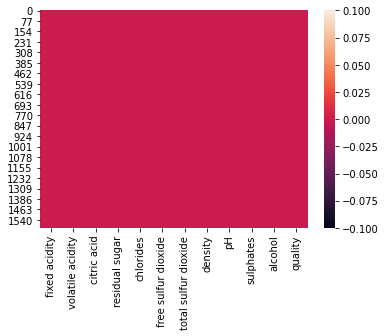

In [63]:
sns.heatmap(df.isnull())

In [65]:
#There is no null in dataframe.

<AxesSubplot:>

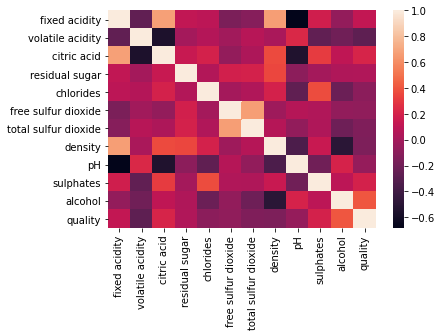

In [66]:
sns.heatmap(df_cor)

In [ ]:
quality is highly correlated with alcohol,then sulphates and citric acid.quality is least correlated with volatile acidity.

In [67]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

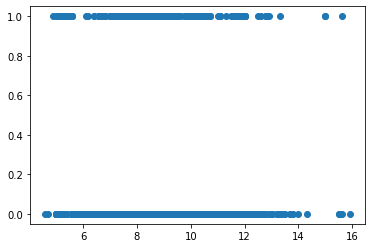

In [68]:
plt.scatter(df['fixed acidity'],df['quality'])

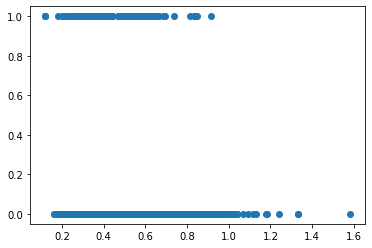

In [69]:
plt.scatter(df['volatile acidity'],df['quality'])

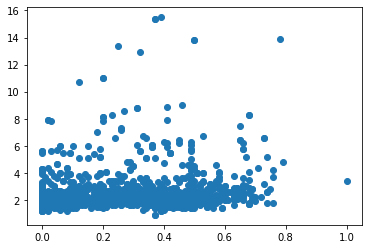

In [70]:
plt.scatter(df['citric acid'],df['residual sugar'])

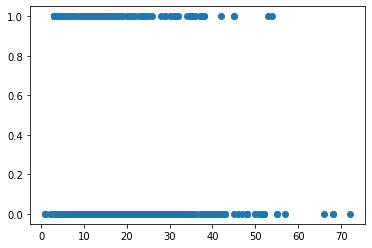

In [71]:
plt.scatter(df['free sulfur dioxide'],df['quality'])

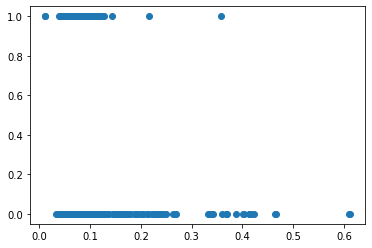

In [72]:
plt.scatter(df['chlorides'],df['quality'])

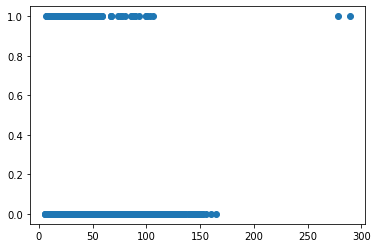

In [73]:
plt.scatter(df['total sulfur dioxide'],df['quality'])

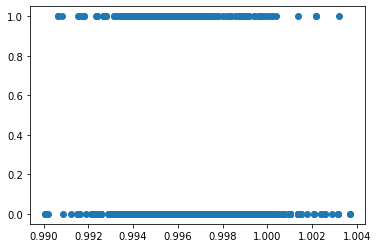

In [74]:
plt.scatter(df['density'],df['quality'])

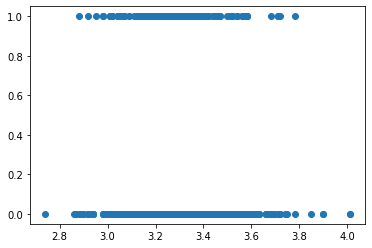

In [75]:
plt.scatter(df['pH'],df['quality'])

<AxesSubplot:xlabel='pH', ylabel='Density'>

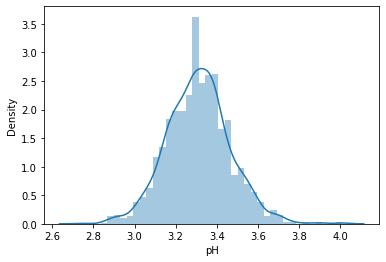

In [76]:
sns.distplot(df['pH'])

In [77]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

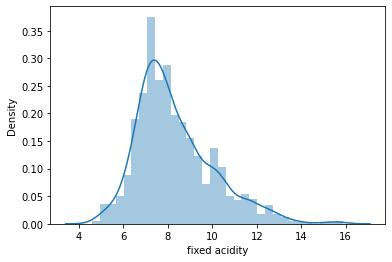

In [78]:
sns.distplot(df['fixed acidity'])

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

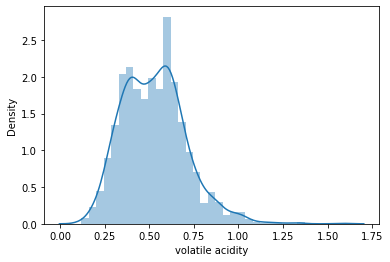

In [79]:
sns.distplot(df['volatile acidity'])

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

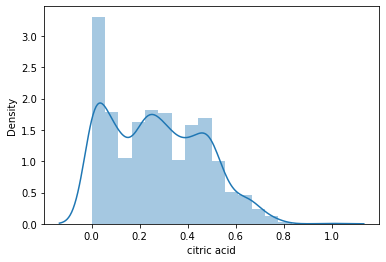

In [80]:
sns.distplot(df['citric acid'])


<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

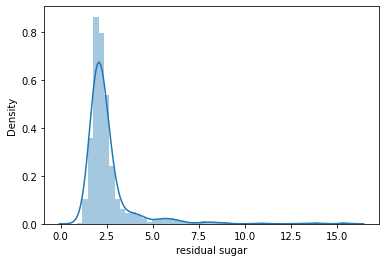

In [81]:
sns.distplot(df['residual sugar'])

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

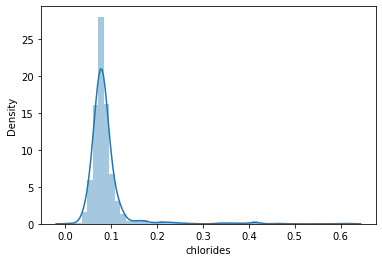

In [82]:
sns.distplot(df['chlorides'])

In [ ]:
this plot shows skewness .

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

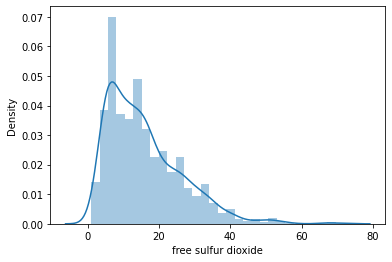

In [83]:
sns.distplot(df['free sulfur dioxide'])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

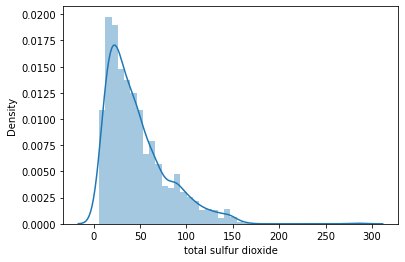

In [84]:
sns.distplot(df['total sulfur dioxide'])

In [ ]:
it shows skewness.

<AxesSubplot:xlabel='density', ylabel='Density'>

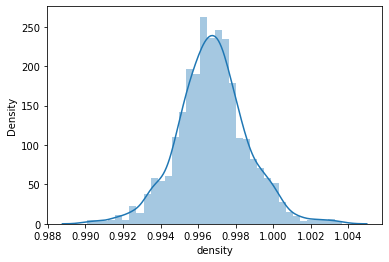

In [85]:
sns.distplot(df['density'])

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

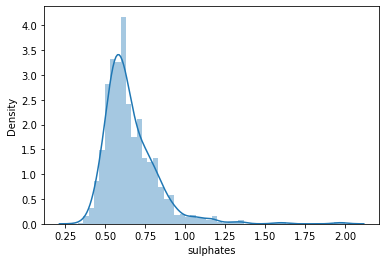

In [86]:
sns.distplot(df['sulphates'])

In [ ]:
it dist plot shows skewnees.

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

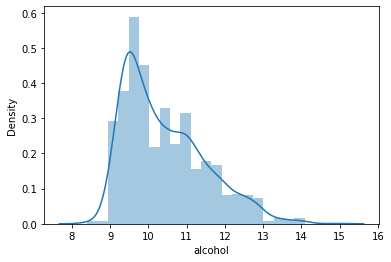

In [87]:
sns.distplot(df['alcohol'])

In [ ]:
this dist plot with density shows skewness.

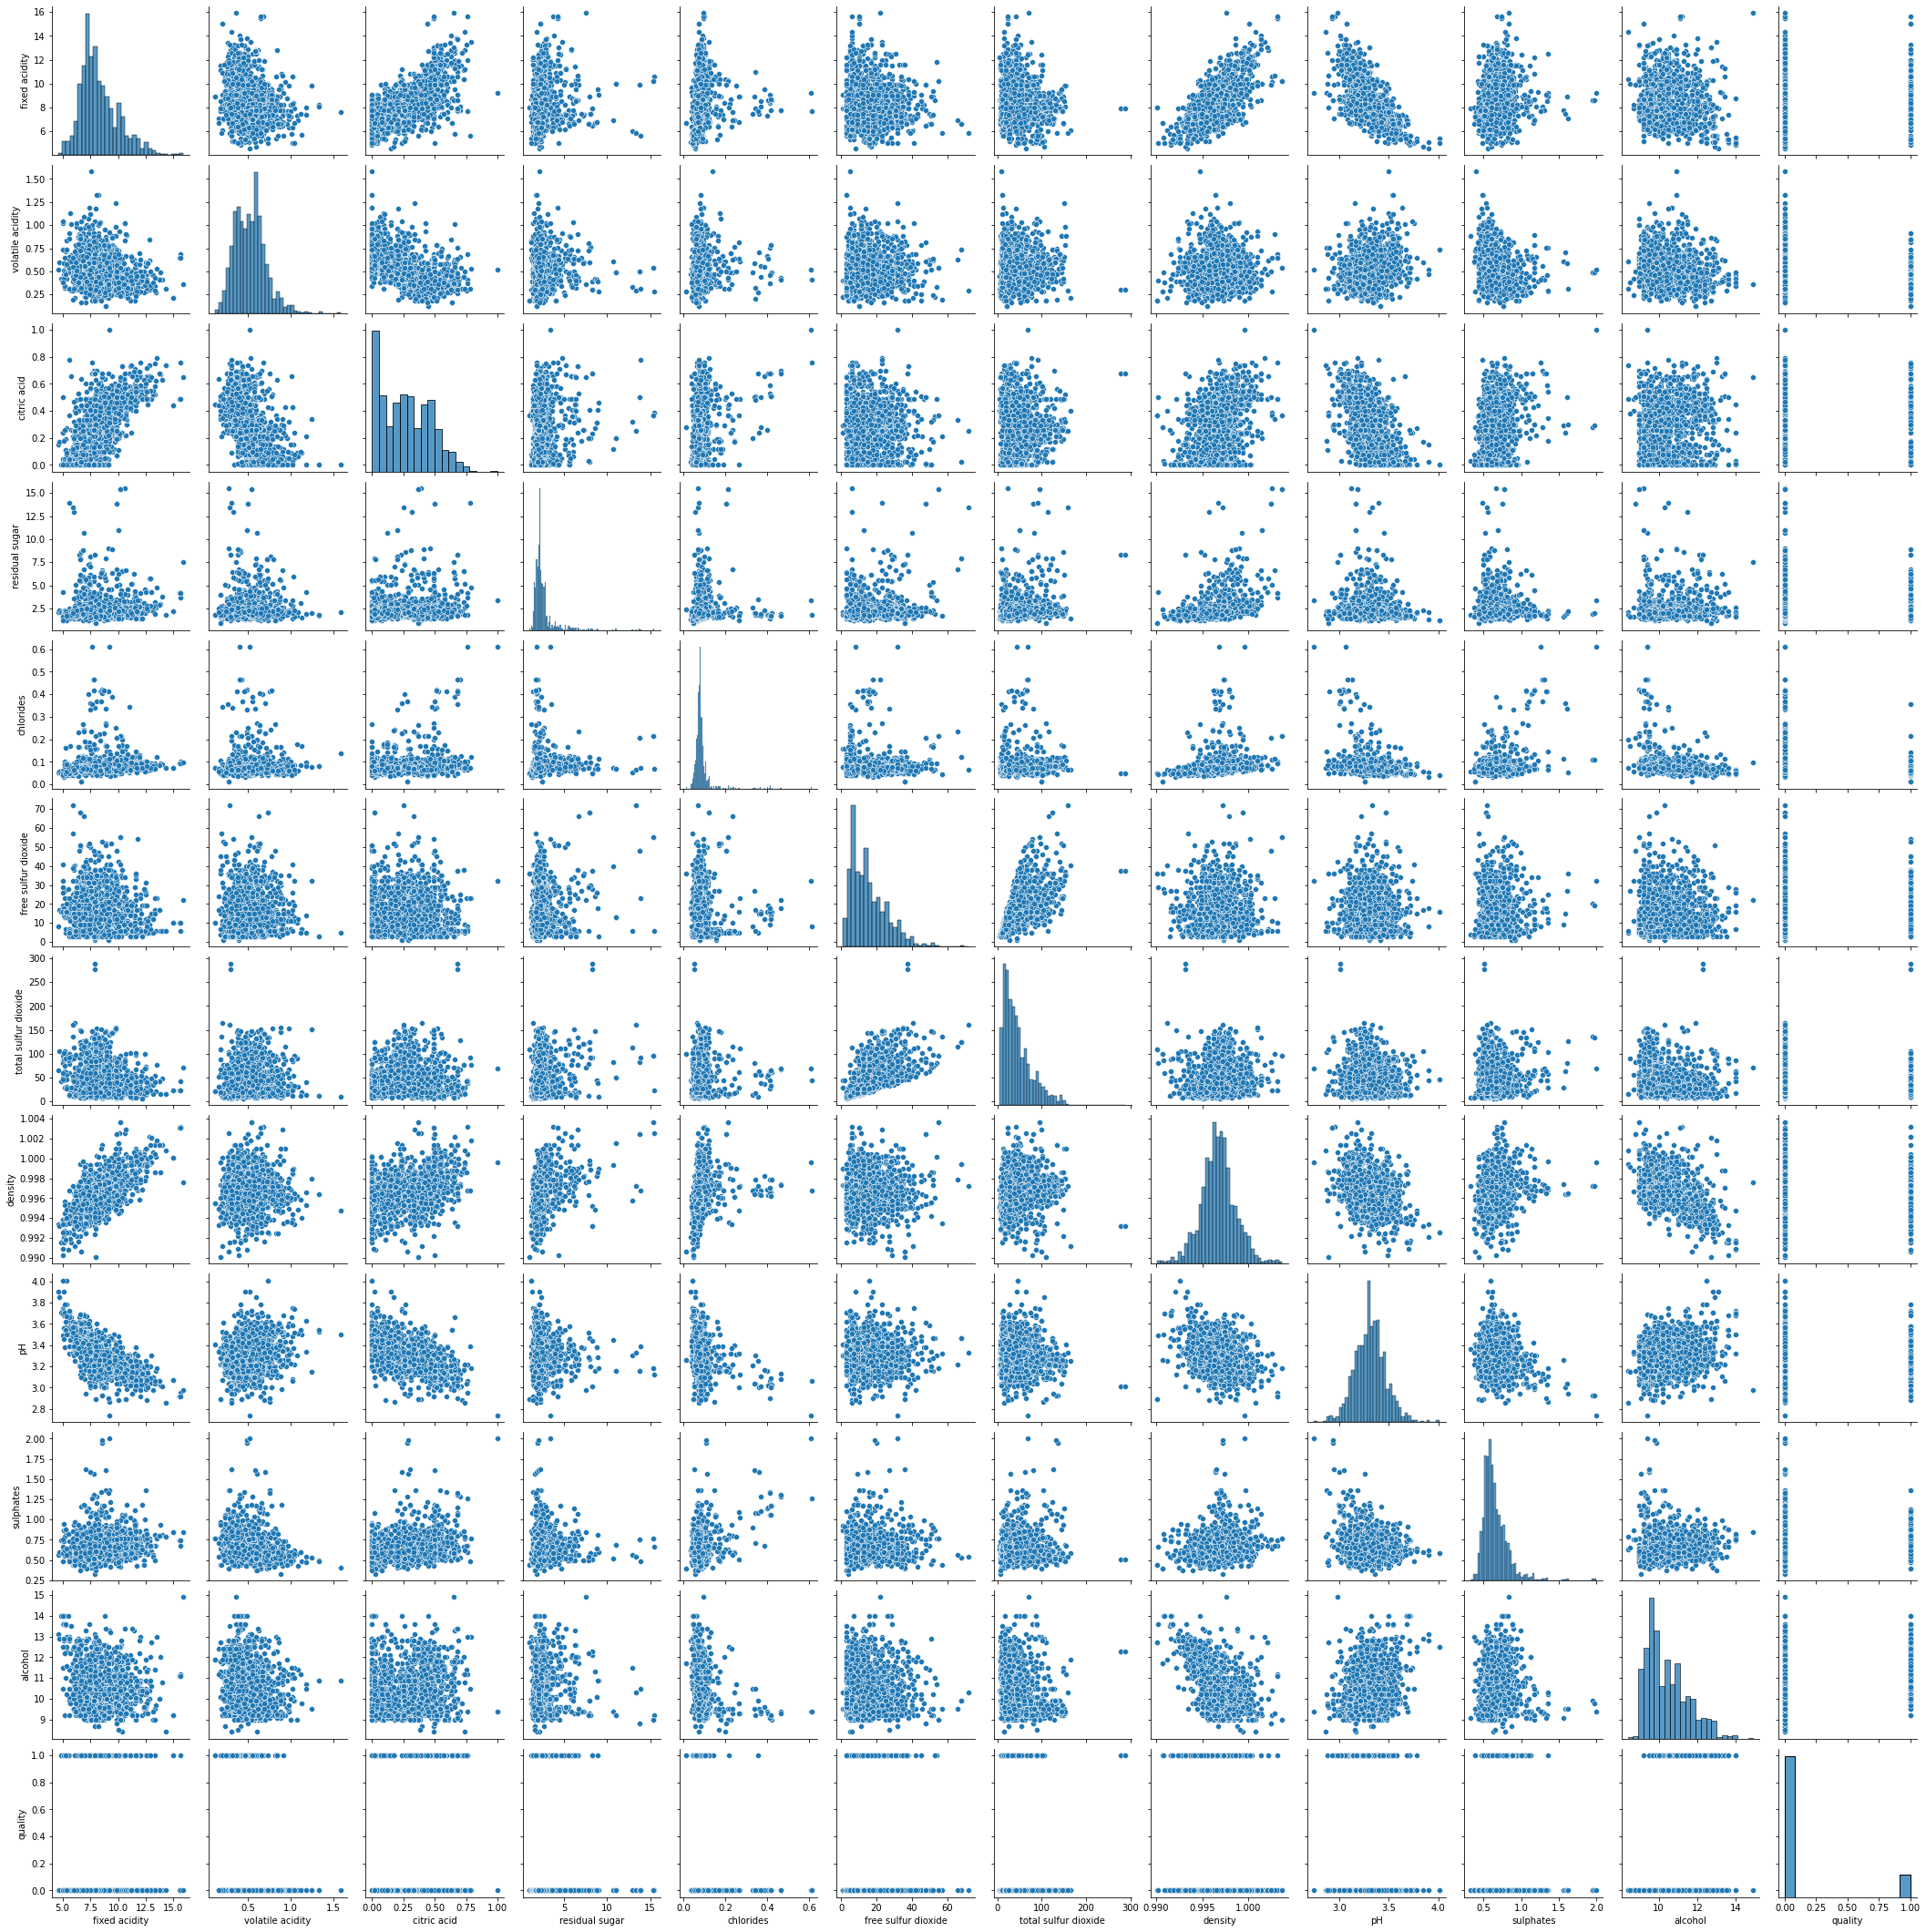

In [88]:
sns.pairplot(df)

In [89]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 2.129363
dtype: float64

In [90]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [91]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
4               7.4             0.700         0.00            1.90      0.076   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               7.5             0.500         0.36            6.10      0.071   
10              6.7             0.580         0.08            1.80      0.097   
11              7.5             0.500         0.36            6.10      0.071   
12              5.6             0.615         0.00            1.60      0.089   
13              7.8             0.610         0.29            1.60      0.114   
14              8.9             0.620         0.18            3.80      0.176   
15              8.9             0.620         0.19            3.90      0.170   
16              8.5             0.280         0.56            1.80      0.092   
17              8.1             0.560         0.28            1.70      0.368   
18              7.4             0.590         0.08            4.40      0.086   
19              7.9             0.320         0.51            1.80      0.341   
20              8.9             0.220         0.48            1.80      0.077   
21              7.6             0.390         0.31            2.30      0.082   
22              7.9             0.430         0.21            1.60      0.106   
23              8.5             0.490         0.11            2.30      0.084   
24              6.9             0.400         0.14            2.40      0.085   
25              6.3             0.390         0.16            1.40      0.080   
26              7.6             0.410         0.24            1.80      0.080   
27              7.9             0.430         0.21            1.60      0.106   
28              7.1             0.710         0.00            1.90      0.080   
29              7.8             0.645         0.00            2.00      0.082   
30              6.7             0.675         0.07            2.40      0.089   
31              6.9             0.685         0.00            2.50      0.105   
32              8.3             0.655         0.12            2.30      0.083   
33              6.9             0.605         0.12           10.70      0.073   
34              5.2             0.320         0.25            1.80      0.103   
35              7.8             0.645         0.00            5.50      0.086   
36              7.8             0.600         0.14            2.40      0.086   
37              8.1             0.380         0.28            2.10      0.066   
38              5.7             1.130         0.09            1.50      0.172   
39              7.3             0.450         0.36            5.90      0.074   
40              7.3             0.450         0.36            5.90      0.074   
41              8.8             0.610         0.30            2.80      0.088   
42              7.5             0.490         0.20            2.60      0.332   
43              8.1             0.660         0.22            2.20      0.069   
44              6.8             0.670         0.02            1.80      0.050   
45              4.6             0.520         0.15            2.10      0.054   
46              7.7             0.935         0.43            2.20      0.114   
47              8.7             0.290         0.52            1.60      0.113   
48              6.4             0.400

<AxesSubplot:>

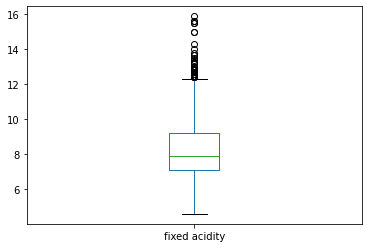

In [92]:
df['fixed acidity'].plot.box()

outliers are present in this boxplot.

<AxesSubplot:>

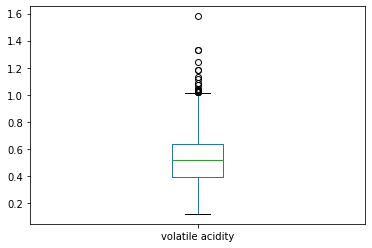

In [93]:
df['volatile acidity'].plot.box()

outliers are present in this boxplot.

<AxesSubplot:>

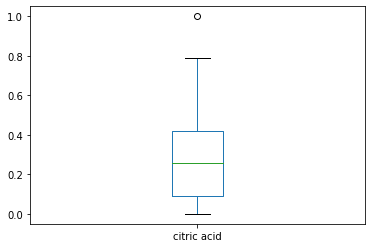

In [94]:
df['citric acid'].plot.box()

not much outliers are present in this boxplot.

<AxesSubplot:>

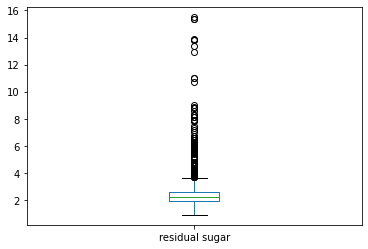

In [95]:
df['residual sugar'].plot.box()

outliers are present in this boxplot.

<AxesSubplot:>

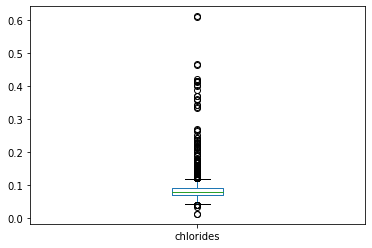

In [96]:
df['chlorides'].plot.box()

outliers are present in this boxplot.

<AxesSubplot:>

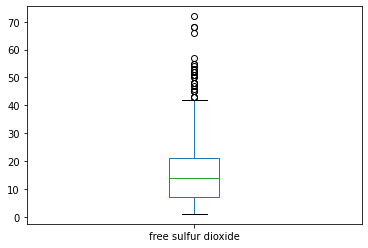

In [97]:
df['free sulfur dioxide'].plot.box()

outliers are present in this boxplot.

<AxesSubplot:>

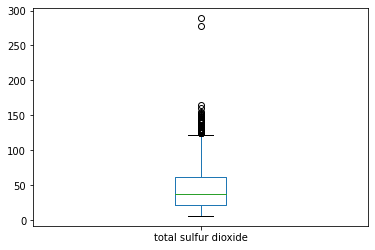

In [98]:
df['total sulfur dioxide'].plot.box()

outliers are present in this boxplot.

<AxesSubplot:>

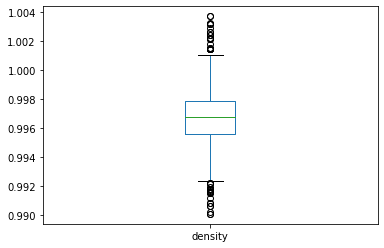

In [99]:
df['density'].plot.box()

outliers are present in this boxplot.

<AxesSubplot:>

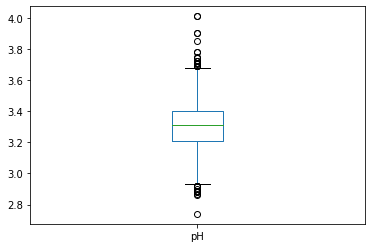

In [100]:
df['pH'].plot.box()

outliers are present in this boxplot.

<AxesSubplot:>

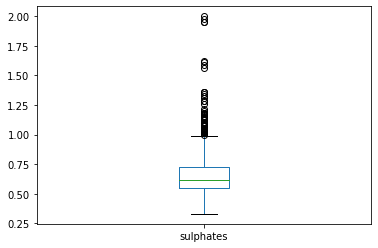

In [101]:
df['sulphates'].plot.box()

#outliers are present

<AxesSubplot:>

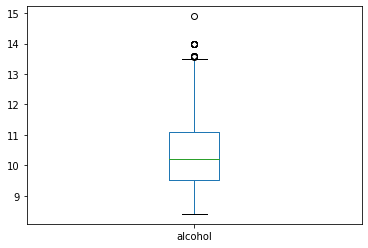

In [102]:
df['alcohol'].plot.box()

#outliers are present

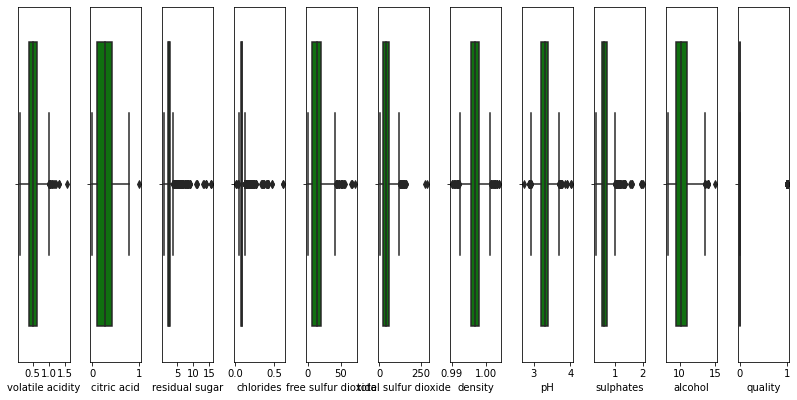

In [103]:
collist=df.columns.values
ncol=22
nrows=20
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [104]:
df['residual sugar']=np.log1p(df['residual sugar'])

In [105]:
df['free sulfur dioxide']=np.log1p(df['free sulfur dioxide'])

In [106]:
df['total sulfur dioxide']=np.log1p(df['total sulfur dioxide'])

In [107]:
df['chlorides']=np.log1p(df['chlorides'])

In [108]:
df['fixed acidity']=np.log1p(df['fixed acidity'])

In [109]:
df['alcohol']=np.log1p(df['alcohol'])

In [110]:
df['sulphates']=np.log1p(df['sulphates'])

In [111]:
df.skew()

fixed acidity           0.455743
volatile acidity        0.671593
citric acid             0.318337
residual sugar          2.255076
chlorides               5.071476
free sulfur dioxide    -0.097399
total sulfur dioxide   -0.035746
density                 0.071288
pH                      0.193683
sulphates               1.610497
alcohol                 0.677798
quality                 2.129363
dtype: float64

In [112]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          2.128232             0.700         0.00        1.064711   0.073250   
1          2.174752             0.880         0.00        1.280934   0.093490   
2          2.174752             0.760         0.04        1.193922   0.088011   
3          2.501436             0.280         0.56        1.064711   0.072321   
4          2.128232             0.700         0.00        1.064711   0.073250   
5          2.128232             0.660         0.00        1.029619   0.072321   
6          2.186051             0.600         0.06        0.955511   0.066724   
7          2.116256             0.650         0.00        0.788457   0.062975   
8          2.174752             0.580         0.02        1.098612   0.070458   
9          2.140066             0.500         0.36        1.960095   0.068593   
10         2.041220             0.580         0.08        1.029619   0.092579   
11         2.140066             0.500         0.36        1.960095   0.068593   
12         1.887070             0.615         0.00        0.955511   0.085260   
13         2.174752             0.610         0.29        0.955511   0.107957   
14         2.292535             0.620         0.18        1.568616   0.162119   
15         2.292535             0.620         0.19        1.589235   0.157004   
16         2.251292             0.280         0.56        1.029619   0.088011   
17         2.208274             0.560         0.28        0.993252   0.313350   
18         2.128232             0.590         0.08        1.686399   0.082501   
19         2.186051             0.320         0.51        1.029619   0.293416   
20         2.292535             0.220         0.48        1.029619   0.074179   
21         2.151762             0.390         0.31        1.193922   0.078811   
22         2.186051             0.430         0.21        0.955511   0.100750   
23         2.251292             0.490         0.11        1.193922   0.080658   
24         2.066863             0.400         0.14        1.223775   0.081580   
25         1.987874             0.390         0.16        0.875469   0.076961   
26         2.151762             0.410         0.24        1.029619   0.076961   
27         2.186051             0.430         0.21        0.955511   0.100750   
28         2.091864             0.710         0.00        1.064711   0.076961   
29         2.174752             0.645         0.00        1.098612   0.078811   
30         2.041220             0.675         0.07        1.223775   0.085260   
31         2.066863             0.685         0.00        1.252763   0.099845   
32         2.230014             0.655         0.12        1.193922   0.079735   
33         2.066863             0.605         0.12        2.459589   0.070458   
34         1.824549             0.320         0.25        1.029619   0.098034   
35         2.174752             0.645         0.00        1.871802   0.082501   
36         2.174752             0.600         0.14        1.223775   0.082501   
37         2.208274             0.380         0.28        1.131402   0.063913   
38         1.902108             1.130         0.09        0.916291   0.158712   
39         2.116256             0.450         0.36        1.931521   0.071390   
40         2.116256             0.450         0.36        1.931521   0.071390   
41         2.282382             0.610         0.30        1.335001   0.084341   
42         2.140066             0.490         0.20        1.280934   0.286682   
43         2.208274             0.660         0.22        1.163151   0.066724   
44         2.054124             0.670         0.02        1.029619   0.048790   
45         1.722767             0.520         0.15        1.131402   0.052592   
46         2.163323             0.935         0.43        1.163151   0.107957   
47         2.272126             0.290         0.52        0.955511   0.107059   
48         2.001480             0.400

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

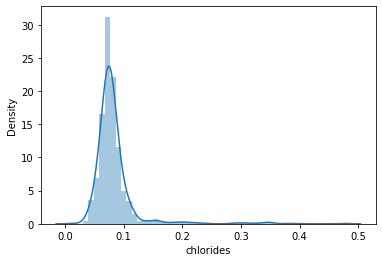

In [113]:
sns.distplot(df['chlorides'])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

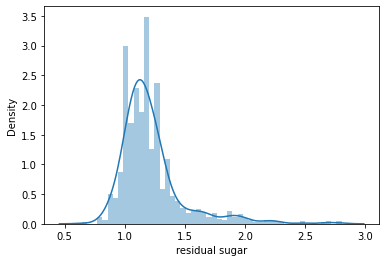

In [114]:
sns.distplot(df['residual sugar'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

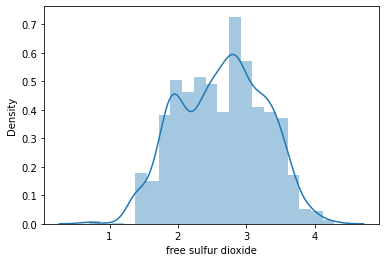

In [115]:
sns.distplot(df['free sulfur dioxide'])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

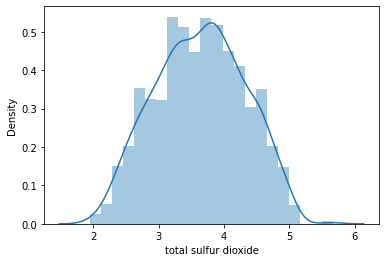

In [116]:
sns.distplot(df['total sulfur dioxide'])

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

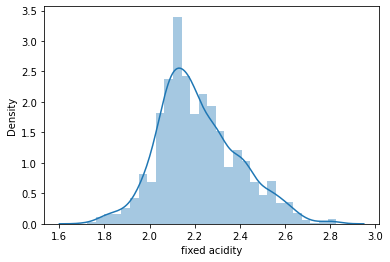

In [117]:
sns.distplot(df['fixed acidity'])

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

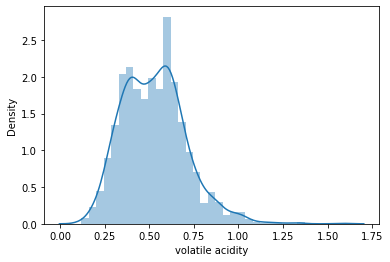

In [118]:
sns.distplot(df['volatile acidity'])

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

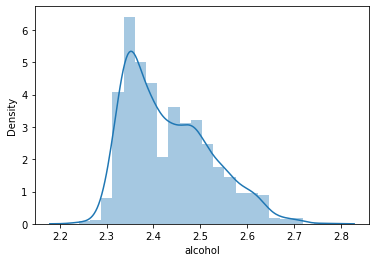

In [119]:
sns.distplot(df['alcohol'])

# Removing Outliers


In [120]:
from scipy.stats import zscore
zscr=np.abs(zscore(df))
print(np.where(zscr>3))

(array([  13,   17,   17,   19,   33,   38,   42,   43,   45,   81,   81,
         83,   86,   88,   91,   92,   95,  106,  106,  120,  126,  127,
        142,  144,  147,  151,  151,  151,  151,  163,  164,  169,  169,
        181,  199,  226,  226,  240,  243,  244,  258,  258,  274,  281,
        291,  324,  325,  339,  396,  400,  413,  415,  442,  442,  451,
        467,  480,  480,  494,  530,  535,  554,  554,  555,  555,  557,
        557,  566,  567,  568,  588,  595,  608,  614,  639,  649,  652,
        652,  652,  666,  672,  690,  692,  695,  723,  724,  730,  754,
        773,  776,  777,  821,  836,  837,  889,  889,  911,  917,  923,
       1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1081, 1111, 1114,
       1165, 1186, 1235, 1244, 1260, 1269, 1269, 1270, 1270, 1299, 1300,
       1312, 1316, 1319, 1319, 1321, 1370, 1372, 1374, 1434, 1434, 1435,
       1435, 1474, 1474, 1476, 1476, 1558, 1558, 1570, 1574, 1589],
      dtype=int64), array([ 9,  4,  9,  4,  3,  1,  4, 

In [121]:
zscr[13][9]

4.684371559356448

In [122]:
zscr[1566][1]

2.054820677440945

In [123]:
df_new=df[(zscr<3).all(axis=1)]

In [124]:
df_new.shape

(1483, 12)

In [125]:
df.shape

(1599, 12)

In [126]:
x=df_new.iloc[:,0:-1]
y=df_new.iloc[:,-1]


In [127]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       2.128232              0.70         0.00        1.064711   0.073250   
1       2.174752              0.88         0.00        1.280934   0.093490   
2       2.174752              0.76         0.04        1.193922   0.088011   
3       2.501436              0.28         0.56        1.064711   0.072321   
4       2.128232              0.70         0.00        1.064711   0.073250   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0             2.484907              3.555348   0.9978  3.51   0.444686   
1             3.258097              4.219508   0.9968  3.20   0.518794   
2             2.772589              4.007333   0.9970  3.26   0.500775   
3             2.890372              4.110874   0.9980  3.16   0.457425   
4             2.484907              3.555348   0.9978  3.51   0.444686   

    alcohol  quality  
0  2.341806        0  
1  2.379546        0  
2  2.379546        0  
3  2.379546        0  
4  2.341806        0

In [128]:
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          2.128232             0.700         0.00        1.064711   0.073250   
1          2.174752             0.880         0.00        1.280934   0.093490   
2          2.174752             0.760         0.04        1.193922   0.088011   
3          2.501436             0.280         0.56        1.064711   0.072321   
4          2.128232             0.700         0.00        1.064711   0.073250   
5          2.128232             0.660         0.00        1.029619   0.072321   
6          2.186051             0.600         0.06        0.955511   0.066724   
7          2.116256             0.650         0.00        0.788457   0.062975   
8          2.174752             0.580         0.02        1.098612   0.070458   
9          2.140066             0.500         0.36        1.960095   0.068593   
10         2.041220             0.580         0.08        1.029619   0.092579   
11         2.140066             0.500         0.36        1.960095   0.068593   
12         1.887070             0.615         0.00        0.955511   0.085260   
14         2.292535             0.620         0.18        1.568616   0.162119   
15         2.292535             0.620         0.19        1.589235   0.157004   
16         2.251292             0.280         0.56        1.029619   0.088011   
18         2.128232             0.590         0.08        1.686399   0.082501   
20         2.292535             0.220         0.48        1.029619   0.074179   
21         2.151762             0.390         0.31        1.193922   0.078811   
22         2.186051             0.430         0.21        0.955511   0.100750   
23         2.251292             0.490         0.11        1.193922   0.080658   
24         2.066863             0.400         0.14        1.223775   0.081580   
25         1.987874             0.390         0.16        0.875469   0.076961   
26         2.151762             0.410         0.24        1.029619   0.076961   
27         2.186051             0.430         0.21        0.955511   0.100750   
28         2.091864             0.710         0.00        1.064711   0.076961   
29         2.174752             0.645         0.00        1.098612   0.078811   
30         2.041220             0.675         0.07        1.223775   0.085260   
31         2.066863             0.685         0.00        1.252763   0.099845   
32         2.230014             0.655         0.12        1.193922   0.079735   
34         1.824549             0.320         0.25        1.029619   0.098034   
35         2.174752             0.645         0.00        1.871802   0.082501   
36         2.174752             0.600         0.14        1.223775   0.082501   
37         2.208274             0.380         0.28        1.131402   0.063913   
39         2.116256             0.450         0.36        1.931521   0.071390   
40         2.116256             0.450         0.36        1.931521   0.071390   
41         2.282382             0.610         0.30        1.335001   0.084341   
44         2.054124             0.670         0.02        1.029619   0.048790   
46         2.163323             0.935         0.43        1.163151   0.107957   
47         2.272126             0.290         0.52        0.955511   0.107059   
48         2.001480             0.400         0.23        0.955511   0.063913   
49         1.887070             0.310         0.37        0.875469   0.071390   
50         2.282382             0.660         0.26        0.993252   0.071390   
51         2.028148             0.520         0.04        1.163151   0.066724   
52         2.028148             0.500         0.04        1.131402   0.065788   
53         2.261763             0.380         0.36        1.386294   0.077887   
54         2.151762             0.510         0.15        1.335001   0.104360   
55         2.163323             0.620         0.04        1.568616   0.080658   
56         2.415914             0.420

In [129]:
y

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       1
8       1
9       0
10      0
11      0
12      0
14      0
15      0
16      1
18      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
34      0
35      0
36      0
37      1
39      0
40      0
41      0
44      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      1
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
82      0
84      0
85      0
87      0
89      0
90      0
93      0
94      0
96      0
97      0
98      0
99      0
100     0
101     0
102     0
103     0
104     0
105     0
107     0
108     0
109     0
110     0
111     0
112     0
113     0
114     0
115     0


In [140]:

def get_score(model):

    max_i=0
    max_score=0


    for i in range(1,200):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        acc= accuracy_score(y_test,pred)
        #print("accuracy score",acc)

        if(acc > max_score):
            max_score=acc
            max_i=i
    print("max score",max_score)
    print("max i",max_i)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))


In [141]:
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)
dt=DecisionTreeClassifier()
kn=KNeighborsClassifier()
m=MultinomialNB()
sv=SVC()
list=[dt,kn,sv,m]

for var in list:
    print(var)
    get_score(var)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
max score 0.9081632653061225
max i 20
[[379  45]
 [ 34  32]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       424
           1       0.42      0.48      0.45        66

    accuracy                           0.84       490
   macro avg       0.67      0.69      0.68       490
weighted avg       0.85      0.84      0.84       490

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
max score 0.9
max i 


# AUC ROC CURVE

In [132]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [150]:
y_pred_prob=dt.predict_proba(x_test)[:,0]

In [151]:
y_pred_prob

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1.

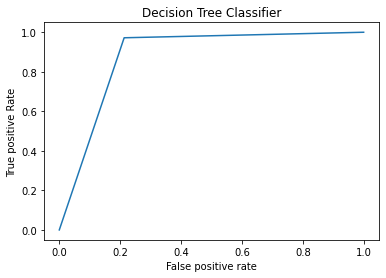

0.8794566089648057

In [152]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive Rate')
plt.title('Decision Tree Classifier')
plt.show()
auc_score=roc_auc_score(y_test,dt.predict(x_test))
auc_score

# cross validation

In [153]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dt,x,y,cv=7)   
print(score)
print(score.mean(),score.std())

[0.85849057 0.77358491 0.78301887 0.87264151 0.74528302 0.83018868
 0.83412322]
0.8139043957026609 0.043753243854189924


In [154]:
score=cross_val_score(kn,x,y,cv=7)   
print(score)
print(score.mean(),score.std())

[0.87264151 0.85377358 0.84433962 0.86320755 0.74056604 0.88679245
 0.86255924]
0.8462685709175917 0.04491754884534788


In [155]:
score=cross_val_score(m,x,y,cv=7)   
print(score)
print(score.mean(),score.std())

[0.86320755 0.86320755 0.86320755 0.86320755 0.86320755 0.86320755
 0.86729858]
0.8637919801739884 0.0014315626490761493


In [156]:
score=cross_val_score(sv,x,y,cv=7)   
print(score)
print(score.mean(),score.std())

[0.86320755 0.86320755 0.86320755 0.86320755 0.86320755 0.86320755
 0.86729858]
0.8637919801739884 0.0014315626490761493


# Grid search CV

In [157]:
from sklearn.model_selection import GridSearchCV
parameters={'kernel':['linear','rbf','poly'],'C':[1,10]}
clf=GridSearchCV(sv,parameters)
clf.fit(x,y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [158]:
print(clf.best_params_)

{'C': 10, 'kernel': 'poly'}


In [159]:
print(clf.best_score_)

0.8759271746459879


In [160]:
grid_param={'criterion':['gini','entropy']}
GSC=GridSearchCV(dt,grid_param,scoring='accuracy',cv=5)
GSC.fit(x,y)
print(GSC.best_params_)
print(GSC.best_score_)

{'criterion': 'gini'}
0.8267026298044504


# Saving the model

In [161]:
import joblib
joblib.dump(m,"mnmodel.obj")

['mnmodel.obj']

In [162]:
file=joblib.load("mnmodel.obj")

In [163]:
file.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,